In [3]:
!{sys.executable} -m pip install --user numpy
import numpy as np
!{sys.executable} -m pip install --user pandas
import pandas as pd
import csv
!{sys.executable} -m pip install --user matplotlib
from matplotlib import pyplot as plt
get_ipython().system('{sys.executable} -m pip install --user scikit-learn')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

"{sys.executable}" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"{sys.executable}" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"{sys.executable}" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


"{sys.executable}" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Первый пункт

In [4]:
df = pd.read_csv('forestfires.csv')

In [5]:
days = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
         'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['day'] = df['day'].replace(days)
df['month'] = df['month'].replace(months)

display(df.head())

C:\Users\Anton\AppData\Local\Temp\ipykernel_9668\1989375122.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['day'] = df['day'].replace(days)
C:\Users\Anton\AppData\Local\Temp\ipykernel_9668\1989375122.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace(months)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
#df_X = df[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
df_X = df[['FFMC']]
df_Y = df[['area']]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)

X_train

,FFMC
329,92.2
173,90.9
272,92.1
497,96.1
182,86.8
...,...
71,94.3
106,91.4
270,92.1
435,90.8


Второй пункт

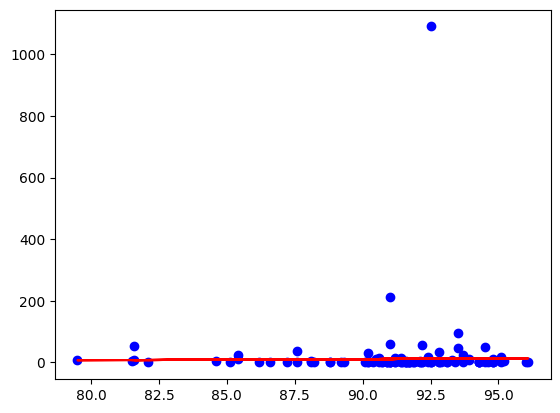

Coefficients: 
 [[0.37568848]]
Mean squared error: 11848.35


In [7]:

model = LinearRegression().fit(X_train, y_train)
Y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, Y_pred, color='red', label='Linear regression')
plt.show()
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, Y_pred))

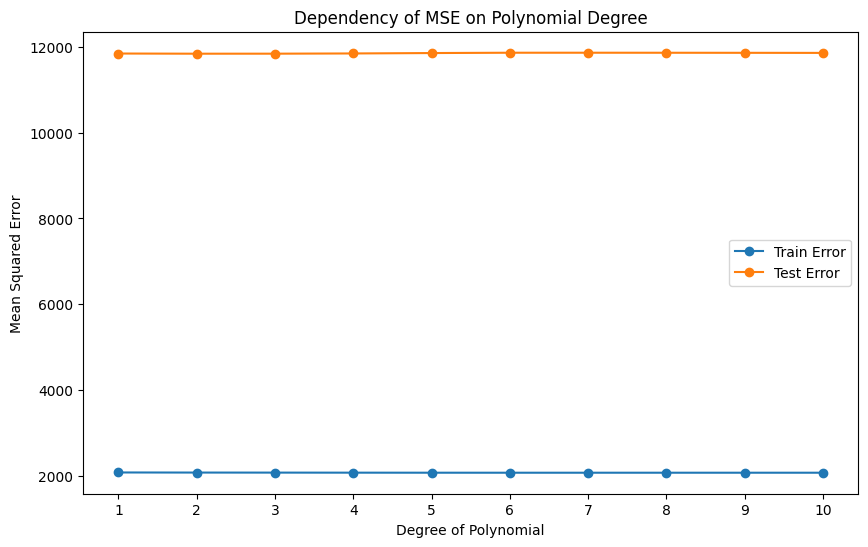

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Создание пустых списков для хранения ошибок
train_errors = []
test_errors = []

# Рассмотрим полиномы от 1 до 10 степени
degrees = np.arange(1, 11)

for degree in degrees:
    # Создание и обучение модели с использованием полиномиальных признаков
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # Предсказание на обучающей и тестовой выборках
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Вычисление ошибок
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Добавление ошибок в список
    train_errors.append(train_error)
    test_errors.append(test_error)

# Построение графика
plt.figure(figsize=(10, 6))
#plt.scatter(df_X, df_Y , color='blue', label='Actual data')
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Dependency of MSE on Polynomial Degree')
plt.legend()
#plt.grid(True)
plt.xticks(degrees)
plt.show()



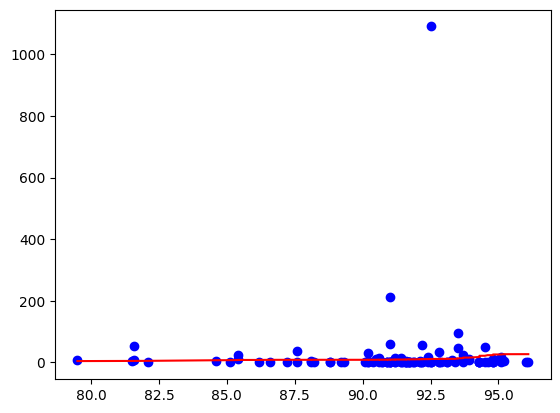

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = [1, 4, 15]

Z = X_test
X = X_train
y = y_train

poly = PolynomialFeatures(degree=7, include_bias=False)

pipeline = Pipeline(
        [
            ("polynomial_features", poly),
            ("linear_regression", model),
        ]
    )

pipeline.fit(X, y)

scores = cross_val_score( pipeline, X, y, scoring="neg_mean_squared_error")

g = sorted(model.predict(poly.fit_transform(Z)))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(sorted(X_test.to_numpy()), sorted(g), color='red')






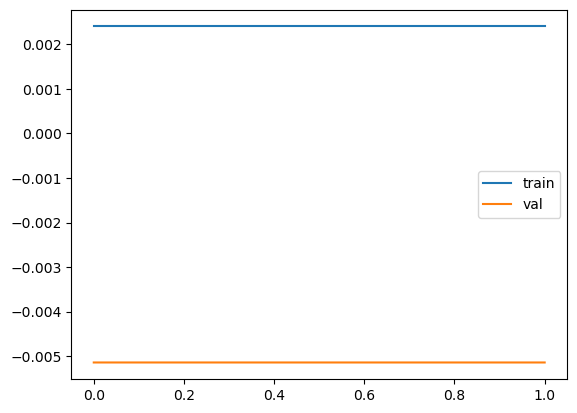

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.metrics import r2_score



def plot_dependence_on_alpha(x_train, y_train, x_val, y_val, num_steps):
    r2_train = []
    r2_val = []
    alpha_values = np.linspace(0, 1, num_steps).tolist()
    for alpha in alpha_values:
        ridge_model = linear_model.Ridge(alpha=alpha)
        ridge_model.fit(x_train, y_train)

        r2_train.append(r2_score(y_train, ridge_model.predict(x_train)))
        r2_val.append(r2_score(y_val, ridge_model.predict(x_val)))
    
    plt.plot(alpha_values, r2_train, label="train")
    plt.plot(alpha_values, r2_val, label="val")
    plt.legend()
    plt.show()

plot_dependence_on_alpha(X_train, y_train, X_test, y_test, 10)